In [2]:
import pandas as pd
from glob import glob
import numpy as np
from torch import tensor
import torch
import re
import csv
import sys
import os
import torch as th
import matplotlib.pyplot as plt

In [1]:
import dgl
from dgl import save_graphs, load_graphs
from dgl.data.utils import makedirs, save_info, load_info

In [29]:
file = '~/Downloads/countryInfo.txt'  ## file location geoname

geo_data = pd.read_csv(file,skiprows=50,encoding='utf-8',sep='\t',engine='python')
geo_columns = geo_data.columns.tolist()   ## load content into list
geo_data

,ISO,ISO3,ISO-Numeric,fips,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Postal Code Format,Postal Code Regex,Languages,geonameid,neighbours,EquivalentFipsCode
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,.ad,EUR,Euro,376,AD###,^(?:AD)*(\d{3})$,ca,3041565,"ES,FR",NaN
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,.ae,AED,Dirham,971,NaN,NaN,"ar-AE,fa,en,hi,ur",290557,"SA,OM",NaN
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,.af,AFN,Afghani,93,NaN,NaN,"fa-AF,ps,uz-AF,tk",1149361,"TM,CN,IR,TJ,PK,UZ",NaN
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NaN,.ag,XCD,Dollar,+1-268,NaN,NaN,en-AG,3576396,NaN,NaN
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NaN,.ai,XCD,Dollar,+1-264,NaN,NaN,en-AI,3573511,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF,.za,ZAR,Rand,27,####,^(\d{4})$,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",953987,"ZW,SZ,MZ,BW,NA,LS",NaN
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF,.zm,ZMW,Kwacha,260,#####,^(\d{5})$,"en-ZM,bem,loz,lun,lue,ny,toi",895949,"ZW,TZ,MZ,CD,NA,MW,AO",NaN
249,ZW,ZWE,716,ZI,Zimbabwe,Harare,390580.0,14439018,AF,.zw,ZWL,Dollar,263,NaN,NaN,"en-ZW,sn,nr,nd",878675,"ZA,MZ,BW,ZM",NaN
250,CS,SCG,891,YI,Serbia and Montenegro,Belgrade,102350.0,10829175,EU,.cs,RSD,Dinar,381,#####,^(\d{5})$,"cu,hu,sq,sr",8505033,"AL,HU,MK,RO,HR,BA,BG",NaN


In [30]:
# Using DataFrame.copy() create new DaraFrame.
country_data = geo_data[['ISO','ISO3','ISO-Numeric','fips','Country','Continent','geonameid']].copy()
country_columns = country_data.columns.tolist()   ## load content into list
print(country_data)

    ISO ISO3  ISO-Numeric fips                Country Continent  geonameid
0    AD  AND           20   AN                Andorra        EU    3041565
1    AE  ARE          784   AE   United Arab Emirates        AS     290557
2    AF  AFG            4   AF            Afghanistan        AS    1149361
3    AG  ATG           28   AC    Antigua and Barbuda       NaN    3576396
4    AI  AIA          660   AV               Anguilla       NaN    3573511
..   ..  ...          ...  ...                    ...       ...        ...
247  ZA  ZAF          710   SF           South Africa        AF     953987
248  ZM  ZMB          894   ZA                 Zambia        AF     895949
249  ZW  ZWE          716   ZI               Zimbabwe        AF     878675
250  CS  SCG          891   YI  Serbia and Montenegro        EU    8505033
251  AN  ANT          530   NT   Netherlands Antilles       NaN    8505032

[252 rows x 7 columns]


In [75]:
file = '~/Downloads/dependent_countries_territories.csv'  ## file location geoname

geo_data = pd.read_csv(file,encoding='utf-8',on_bad_lines='skip',engine='python')
geo_columns = geo_data.columns.tolist()   ## load content into list
geo_data.head()

,iso code,name,depends from,featurecode,children,Unnamed: 5
0,AN,Netherlands Antilles / Curaçao,NL,PCLIX,?,NaN
1,AQ,Antarctica,12 countries,ADM1,-,NaN
2,AS,American Samoa,US,ADMD,ADMD,NaN
3,AW,Aruba,NL,PCLIX,-,NaN
4,AX,Åland Islands,FI,ISLS,-,NaN


In [151]:
dfinal = country_data.merge(geo_data, how='left', left_on='ISO', right_on='iso code')

##print(geo_data['iso code'].value_counts())
print(len(set(geo_data['iso code'])))
##print(dfinal['iso code'].value_counts())
print(len(set(dfinal['iso code']).difference(['NaN'])))
print(set(dfinal['iso code']).difference(set(geo_data['iso code'])))

dfinal = dfinal[['ISO','ISO3','ISO-Numeric','fips','Country','Continent','geonameid','depends from']].copy()
dfinal=dfinal.rename(columns = {'depends from':'dependsFrom'})
dfinal=dfinal.rename(columns = {'fips':'FIPS'})
dfinal=dfinal.rename(columns = {'Country':'countryName'})
dfinal=dfinal.rename(columns = {'ISO-Numeric':'ISOnumeric'})
dfinal.head()

## dfinal.to_csv('countries.csv',index=False)

In [131]:
file = '~/Downloads/alternateNames/alternateNames.txt'  ## file location geoname

altname_columns = ['alternateNameId','geonameid','isolanguage','altName','isPreferredName','isShortName','isColloquial','isHistoric']   ## alternative contry name table columns, ref: geoname.org
altname_data = pd.read_csv(file,chunksize=10000,header=None,encoding='utf-8',sep='\t',on_bad_lines='skip',engine='python',names=altname_columns)
altname_data = pd.concat(altname_data)
##altname_data.to_csv('alternateNames.csv',index=False)

##a = dfinal.merge(altname_data, how='outer', left_on='geonameid', right_on='geonameid')
##a.to_csv('alternateNames2.csv',index=False)
##b = dfinal.merge(altname_data, how='left', left_on='geonameid', right_on='geonameid')
##b.to_csv('alternateCountryNames.csv',index=False)

In [154]:
file = '~/Downloads/altCountryNames/countries.csv'  ## file location geoname
b = pd.read_csv(file,encoding='utf-8',on_bad_lines='skip',engine='python')

In [155]:
b

,ISO,ISO3,ISOnumeric,FIPS,countryName,Continent,geonameid,dependsFrom
0,AD,AND,20,AN,Andorra,EU,3041565,NaN
1,AE,ARE,784,AE,United Arab Emirates,AS,290557,NaN
2,AF,AFG,4,AF,Afghanistan,AS,1149361,NaN
3,AG,ATG,28,AC,Antigua and Barbuda,NaN,3576396,NaN
4,AI,AIA,660,AV,Anguilla,NaN,3573511,NaN
...,...,...,...,...,...,...,...,...
247,ZA,ZAF,710,SF,South Africa,AF,953987,NaN
248,ZM,ZMB,894,ZA,Zambia,AF,895949,NaN
249,ZW,ZWE,716,ZI,Zimbabwe,AF,878675,NaN
250,CS,SCG,891,YI,Serbia and Montenegro,EU,8505033,NaN


In [153]:
print(dfinal.columns.tolist())
print(b.columns.tolist())

['ISO', 'ISO3', 'ISOnumeric', 'FIPS', 'countryName', 'Continent', 'geonameid', 'dependsFrom']
['ISO', 'ISO3', 'ISOnumeric', 'FIPS', 'countryName', 'Continent', 'geonameid', 'dependsFrom', 'alternateNameId', 'isolanguage', 'altName', 'isPreferredName', 'isShortName', 'isColloquial', 'isHistoric']


countries.csv
252 rows × 8 columns
Columns:
'ISO', 'ISO3', 'ISOnumeric', 'FIPS', 'countryName', 'Continent', 'geonameid', 'dependsFrom'

alternateCountryNames.csv 
44430 rows × 15 columns
Columns:
'ISO', 'ISO3', 'ISOnumeric', 'FIPS', 'countryName', 'Continent', 'geonameid', 'dependsFrom', 'alternateNameId', 'isolanguage', 'altName', 'isPreferredName', 'isShortName', 'isColloquial', 'isHistoric'

Column efinition
ISO               : ISO-3166 2-letter country code
ISO3              : 3-letter ISO country code
ISOnumeric        : numeric ISO country code
FIPS              : most admin1 code are FIPS codes
countryName       : name of the geographical country point
Continent         : geographical continent code
geonameid         : integer id of record in geonames database
dependsFrom       : dependent countries or territories
alternateNameId   : integer id of this alternate name
isolanguage       : iso 639 language code 2- or 3-characters; 4-characters 'post' for postal codes and 'iata','icao' and faac for airport codes, fr_1793 for French Revolution names,  abbr for abbreviation, link to a website (mostly to wikipedia), wkdt for the wikidataid
altName           : alternate name or name variant
isPreferredName   : '1', if this alternate name is an official/preferred name
isShortName       : '1', if this is a short name
isColloquial      : '1', if this alternate name is a colloquial or slang term
isHistoric        : '1', if this alternate name is historic and was used in the past

Continent codes :
AF : Africa			    geonameId=6255146
AS : Asia			    geonameId=6255147
EU : Europe			    geonameId=6255148
NA : North America		geonameId=6255149
OC : Oceania			geonameId=6255151
SA : South America		geonameId=6255150
AN : Antarctica			geonameId=6255152

In [4]:
file = '~/Downloads/institutions.csv'  ## file location geoname

institution_data = pd.read_csv(file,encoding='utf-8',on_bad_lines='skip',engine='python')
institution_columns = institution_data.columns.tolist()   ## load content into list
institution_data.head()

,uuid,code,name,country,altCodes
0,53a694c3-1c30-4aaf-a20f-593d6a791d89,CDZMTU,"Museum of Zoology, Central Department of Zoology",NP,[]
1,3448c872-18f9-4d70-8237-148cd1d87b3f,NHMTU,"Natural History Museum, Tribhuvan University",NP,[]
2,2bf398f7-44e2-4a02-8134-4f96b8c2ca95,IITABJ,The International Institute of Tropical Agricu...,BJ,[]
3,23e0159b-30ed-4968-803c-190d60e11f20,MCCNNUTA,Museo de Universidad Técnica de Ambato,EC,['MCNUTA']
4,57a6e7b4-9fde-4efb-be3b-b800a6dd72f5,QPLS,Herbario Padre Luis Sodiro (QPLS),EC,['BEAEP']


In [34]:
set(institution_data['country']).difference(set(country_data['ISO']))

set()

In [4]:
file = '~/Downloads/0229981-230224095556074.csv'  ## file location Solanaceae
## file = '~/nhm_coding/indian_collection_kg_single.csv'

gbif_sample = pd.read_csv(file,nrows=10000,encoding='utf-8',sep='\\t',on_bad_lines='skip',engine='python')
gbif_columns = gbif_sample.columns.tolist()   ## load content into list
gbif_sample.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,14507359,857aa892-f762-11e1-a439-00145eb45e9a,NaN,Plantae,Tracheophyta,Magnoliopsida,Solanales,Solanaceae,Alkekengi,Alkekengi officinarum,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2023-05-09T00:56:41.255Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
1,21516372,857aa892-f762-11e1-a439-00145eb45e9a,NaN,Plantae,Tracheophyta,Magnoliopsida,Solanales,Solanaceae,Solanum,Solanum dulcamara,...,NaN,NaN,CC_BY_4_0,NaN,Lebreton Alexis,NaN,NaN,2023-05-09T00:56:30.181Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,14517827,857aa892-f762-11e1-a439-00145eb45e9a,NaN,Plantae,Tracheophyta,Magnoliopsida,Solanales,Solanaceae,Alkekengi,Alkekengi officinarum,...,NaN,NaN,CC_BY_4_0,NaN,Jame,NaN,NaN,2023-05-09T00:56:47.180Z,NaN,INSTITUTION_MATCH_NONE
3,10592424,857aa892-f762-11e1-a439-00145eb45e9a,NaN,Plantae,Tracheophyta,Magnoliopsida,Solanales,Solanaceae,Datura,Datura stramonium,...,NaN,NaN,CC_BY_4_0,NaN,Jame,NaN,NaN,2023-05-09T00:56:28.047Z,NaN,INSTITUTION_MATCH_NONE
4,21475075,857aa892-f762-11e1-a439-00145eb45e9a,NaN,Plantae,Tracheophyta,Magnoliopsida,Solanales,Solanaceae,Solanum,Solanum dulcamara,...,NaN,NaN,CC_BY_4_0,NaN,Gaume Raymond,NaN,NaN,2023-05-09T00:56:42.507Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...


In [66]:
file = '~/Downloads/0211142-230224095556074.csv'  ## indian gbif
## file = '~/nhm_coding/indian_collection_kg_single.csv'

gbif_sample = pd.read_csv(file,nrows=10000,encoding='utf-8',sep='\t',on_bad_lines='skip',engine='python')
gbif_columns = gbif_sample.columns.tolist()   ## load content into list
gbif_sample.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4075132801,7e380070-f762-11e1-a439-00145eb45e9a,d90bf344-50af-437f-a489-763c75e080a1,Animalia,Acanthocephala,Palaeacanthocephala,Polymorphida,Centrorhynchidae,Centrorhynchus,NaN,...,Dr Gerald D. Schmidt,NaN,CC0_1_0,NaN,W N. Woodland,NaN,NaN,2023-05-01T13:14:20.209Z,NaN,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...
1,4075131756,7e380070-f762-11e1-a439-00145eb45e9a,d390577e-7bbf-457f-9595-8cb655c96a83,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:18.976Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...
2,4075131752,7e380070-f762-11e1-a439-00145eb45e9a,942ce764-497b-48aa-aa79-ffbecdd79ccd,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:50.919Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...
3,4075131750,7e380070-f762-11e1-a439-00145eb45e9a,bc29537c-51ee-4424-9e97-1781e5123bd9,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:44.001Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...
4,4075131733,7e380070-f762-11e1-a439-00145eb45e9a,76fe3b2a-c779-485e-9305-5d3c178102d7,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:50.875Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...


In [7]:
file = '~/Downloads/0229981-230224095556074.csv'  ## file location, gbif Solanacea
colnames = ['gbifID','occurrenceID','verbatimScientificName','verbatimScientificNameAuthorship','locality',
            'occurrenceStatus','decimalLatitude','decimalLongitude','day','month','year','basisOfRecord',
            'collectionCode','catalogNumber','recordNumber','dateIdentified','recordedBy','identifiedBy',
            'typeStatus','lastInterpreted','issue','stateProvince','taxonKey','institutionCode','countryCode']

gbif_sample = pd.read_csv(file,nrows=10000,encoding='utf-8',sep='\\t',usecols=colnames,on_bad_lines='skip',engine='python')
gbif_columns = gbif_sample.columns.tolist()   ## load content into list
gbif_sample.head()

,gbifID,occurrenceID,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,decimalLatitude,decimalLongitude,...,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,recordedBy,typeStatus,lastInterpreted,issue
0,14507359,NaN,Physalis alkekengi L.,NaN,FR,LAROCHE-SAINT-CYDROINE,NaN,PRESENT,47.9757,3.470130,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20010122165146por,NaN,NaN,NaN,NaN,NaN,2023-05-09T00:56:41.255Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
1,21516372,NaN,Solanum dulcamara L.,NaN,FR,Chateaudun,NaN,PRESENT,48.0761,1.324440,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20030902144741Per,NaN,NaN,NaN,Lebreton Alexis,NaN,2023-05-09T00:56:30.181Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,14517827,NaN,Physalis alkekengi L.,NaN,FR,VRIGNE-AUX-BOIS,NaN,PRESENT,NaN,NaN,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20040203153749Per,NaN,NaN,NaN,Jame,NaN,2023-05-09T00:56:47.180Z,INSTITUTION_MATCH_NONE
3,10592424,NaN,Datura stramonium L.,NaN,FR,Sedan,NaN,PRESENT,NaN,NaN,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20040203155458Per,NaN,NaN,NaN,Jame,NaN,2023-05-09T00:56:28.047Z,INSTITUTION_MATCH_NONE
4,21475075,NaN,Solanum dulcamara L.,NaN,FR,PREUILLY-SUR-CLAISE,NaN,PRESENT,46.8546,0.928775,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,19971126113009ref,NaN,NaN,NaN,Gaume Raymond,NaN,2023-05-09T00:56:42.507Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...


In [30]:
'''This function that will go through the columns of the DataFrame in the order you specified and 
return the column name and the value of the deepest (i.e., closest to 'species') non-null value for each row.''' 

def get_bottom_taxa(df):
    taxa_hierarchy = ['phylum', 'class', 'order', 'family', 'genus', 'species']
    
    # Reverse the order of hierarchy to start from 'species' up to 'phylum'
    reversed_hierarchy = taxa_hierarchy[::-1]
    
    # Store the results in these lists
    deepest_node_name_list = []
    deepest_node_value_list = []

    # Iterate over each row
    for idx, row in df.iterrows():
        # Check each column in the reversed order
        for col in reversed_hierarchy:
            # If the value in a column is not nan, it appends the column name and its content to the respective lists.
            if pd.notna(row[col]):
                deepest_node_name_list.append(col)
                deepest_node_value_list.append(row[col])
                # Stop checking the rest columns
                break
        # If all values in a row are null, it appends None to the lists.
        else:
            deepest_node_name_list.append(None)
            deepest_node_value_list.append(None)
            
    # Add the results to the dataframe
    df['bottomTaxaRank'] = deepest_node_name_list
    df['bottomTaxaValue'] = deepest_node_value_list

    return df
    ## pd.Series(result, index=df.index)

In [34]:
taxa_hierarchy = ['phylum', 'class', 'order', 'family', 'genus', 'species']
get_bottom_taxa(gbif_sample)
gbif_sample.drop(taxa_hierarchy, axis=1, inplace=True)
print(gbif_sample.columns.tolist())

['gbifID', 'occurrenceID', 'verbatimScientificName', 'verbatimScientificNameAuthorship', 'countryCode', 'locality', 'stateProvince', 'occurrenceStatus', 'decimalLatitude', 'decimalLongitude', 'day', 'month', 'year', 'basisOfRecord', 'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber', 'identifiedBy', 'dateIdentified', 'recordedBy', 'typeStatus', 'lastInterpreted', 'issue', 'bottomTaxaRank', 'bottomTaxaValue']


In [36]:
gbif_sample

,gbifID,occurrenceID,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,decimalLatitude,decimalLongitude,...,catalogNumber,recordNumber,identifiedBy,dateIdentified,recordedBy,typeStatus,lastInterpreted,issue,bottomTaxaRank,bottomTaxaValue
0,14507359,NaN,Physalis alkekengi L.,NaN,FR,LAROCHE-SAINT-CYDROINE,NaN,PRESENT,47.9757,3.470130,...,20010122165146por,NaN,NaN,NaN,NaN,NaN,2023-05-09T00:56:41.255Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,species,Alkekengi officinarum
1,21516372,NaN,Solanum dulcamara L.,NaN,FR,Chateaudun,NaN,PRESENT,48.0761,1.324440,...,20030902144741Per,NaN,NaN,NaN,Lebreton Alexis,NaN,2023-05-09T00:56:30.181Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,species,Solanum dulcamara
2,14517827,NaN,Physalis alkekengi L.,NaN,FR,VRIGNE-AUX-BOIS,NaN,PRESENT,NaN,NaN,...,20040203153749Per,NaN,NaN,NaN,Jame,NaN,2023-05-09T00:56:47.180Z,INSTITUTION_MATCH_NONE,species,Alkekengi officinarum
3,10592424,NaN,Datura stramonium L.,NaN,FR,Sedan,NaN,PRESENT,NaN,NaN,...,20040203155458Per,NaN,NaN,NaN,Jame,NaN,2023-05-09T00:56:28.047Z,INSTITUTION_MATCH_NONE,species,Datura stramonium
4,21475075,NaN,Solanum dulcamara L.,NaN,FR,PREUILLY-SUR-CLAISE,NaN,PRESENT,46.8546,0.928775,...,19971126113009ref,NaN,NaN,NaN,Gaume Raymond,NaN,2023-05-09T00:56:42.507Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,species,Solanum dulcamara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1849001464,https://w.jacq.org/W19600010717,Solanum villosum Mill.,NaN,AF,"Kalat, El. 8000 ft. [2438 m]",NaN,PRESENT,NaN,NaN,...,1960-0010717,NaN,S. Knapp,NaN,"Koelz,W.",NaN,2023-04-24T22:20:07.033Z,CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MAT...,species,Solanum villosum
9996,1230525194,https://w.jacq.org/W19660016984,Cestrum laurifolium L'Hér.,NaN,TT,Fl. Trinitatis.,NaN,PRESENT,NaN,NaN,...,1966-0016984,NaN,annot. J. Walter (W) 2013-08,NaN,"Wrbna,F.",ISOTYPE,2023-04-24T22:20:07.131Z,CONTINENT_DERIVED_FROM_COUNTRY;TAXON_MATCH_HIG...,genus,Cestrum
9997,1849002139,https://w.jacq.org/W19720018109,Solanum dulcamara L.,NaN,TR,"Asia minor orient: Malatya, 1000-2500 m.",NaN,PRESENT,NaN,NaN,...,1972-0018109,NaN,S. Knapp 2016,NaN,"Ajtai-Kovach,J.",NaN,2023-04-24T22:20:07.199Z,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE,species,Solanum dulcamara
9998,1849001927,https://w.jacq.org/W19740005677,Solanum incanum L.,NaN,PK,"W-Pakistan, Baluchistan, Makran, Ras Nuh prope...",NaN,PRESENT,25.1500,62.350000,...,1974-0005677,NaN,S. Knapp 2016,NaN,"Rechinger,K.H.",NaN,2023-04-24T22:20:07.208Z,CONTINENT_DERIVED_FROM_COORDINATES;INSTITUTION...,species,Solanum incanum


In [17]:
file = '~/Downloads/dwc-master/dist/simple_dwc_horizontal.csv'  ##file location

dwc_terms = pd.read_csv(file,encoding='utf-8',on_bad_lines='skip',engine='python')
dwc_terms_columns = dwc_terms.columns.tolist()   ## load content into list

In [99]:
print(sorted(dwc_terms_columns))
print(len(dwc_terms_columns))
print(sorted(gbif_columns))
print(len(gbif_columns))
print(sorted(entity_name_list_columns))
print(len(entity_name_list_columns))

['acceptedNameUsage', 'acceptedNameUsageID', 'accessRights', 'associatedMedia', 'associatedOccurrences', 'associatedOrganisms', 'associatedReferences', 'associatedSequences', 'associatedTaxa', 'basisOfRecord', 'bed', 'behavior', 'bibliographicCitation', 'catalogNumber', 'class', 'collectionCode', 'collectionID', 'continent', 'coordinatePrecision', 'coordinateUncertaintyInMeters', 'country', 'countryCode', 'county', 'cultivarEpithet', 'dataGeneralizations', 'datasetID', 'datasetName', 'dateIdentified', 'day', 'decimalLatitude', 'decimalLongitude', 'degreeOfEstablishment', 'disposition', 'dynamicProperties', 'earliestAgeOrLowestStage', 'earliestEonOrLowestEonothem', 'earliestEpochOrLowestSeries', 'earliestEraOrLowestErathem', 'earliestPeriodOrLowestSystem', 'endDayOfYear', 'establishmentMeans', 'eventDate', 'eventID', 'eventRemarks', 'eventTime', 'family', 'fieldNotes', 'fieldNumber', 'footprintSRS', 'footprintSpatialFit', 'footprintWKT', 'formation', 'genericName', 'genus', 'geodeticDat

In [104]:
matches = set(gbif_columns).intersection(set(dwc_terms_columns))
print(matches)
print(len(matches))

{'catalogNumber', 'individualCount', 'typeStatus', 'recordedBy', 'coordinatePrecision', 'genus', 'collectionCode', 'occurrenceID', 'dateIdentified', 'locality', 'kingdom', 'occurrenceStatus', 'decimalLatitude', 'stateProvince', 'institutionCode', 'establishmentMeans', 'license', 'order', 'day', 'class', 'basisOfRecord', 'month', 'phylum', 'decimalLongitude', 'year', 'rightsHolder', 'countryCode', 'recordNumber', 'taxonRank', 'identifiedBy', 'scientificName', 'infraspecificEpithet', 'eventDate', 'family', 'coordinateUncertaintyInMeters'}
35


In [52]:
## file = '~/Downloads/0206719_230224095556074.csv'  ## file location, gbif kew
file = '~/Downloads/0211142-230224095556074.csv'  ## file location, gbif indian
gbif_sample = pd.read_csv(file,chunksize=10000,encoding='utf-8',sep='\s+',on_bad_lines='skip',engine='python')
gbif_sample = pd.concat(gbif_sample)

In [67]:
gbif_sample

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4075132801,7e380070-f762-11e1-a439-00145eb45e9a,d90bf344-50af-437f-a489-763c75e080a1,Animalia,Acanthocephala,Palaeacanthocephala,Polymorphida,Centrorhynchidae,Centrorhynchus,NaN,...,Dr Gerald D. Schmidt,NaN,CC0_1_0,NaN,W N. Woodland,NaN,NaN,2023-05-01T13:14:20.209Z,NaN,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...
1,4075131756,7e380070-f762-11e1-a439-00145eb45e9a,d390577e-7bbf-457f-9595-8cb655c96a83,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:18.976Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...
2,4075131752,7e380070-f762-11e1-a439-00145eb45e9a,942ce764-497b-48aa-aa79-ffbecdd79ccd,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:50.919Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...
3,4075131750,7e380070-f762-11e1-a439-00145eb45e9a,bc29537c-51ee-4424-9e97-1781e5123bd9,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:44.001Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...
4,4075131733,7e380070-f762-11e1-a439-00145eb45e9a,76fe3b2a-c779-485e-9305-5d3c178102d7,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,NaN,NaN,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NaN,2023-05-01T13:14:50.875Z,NaN,TAXON_MATCH_HIGHERRANK;COLLECTION_MATCH_NONE;I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2846108474,7e380070-f762-11e1-a439-00145eb45e9a,23e82adf-4d6e-45d2-bb8f-332af38f5e6d,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Mnesithea,Mnesithea laevis,...,NaN,NaN,CC0_1_0,NaN,Herb. Col. R.H. Beddome. Recd 1885,NaN,NaN,2023-05-01T13:14:16.291Z,StillImage,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...
9996,2846108472,7e380070-f762-11e1-a439-00145eb45e9a,044a61b6-7969-4a94-8077-0ca7f9790b90,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Iseilema,Iseilema prostratum,...,NaN,NaN,CC0_1_0,NaN,Charles Baron Clarke,NaN,NaN,2023-05-01T13:14:16.291Z,StillImage,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...
9997,2846108471,7e380070-f762-11e1-a439-00145eb45e9a,906e980d-fc84-4607-a7b3-faaca1adacc1,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Themeda,Themeda quadrivalvis,...,NaN,NaN,CC0_1_0,NaN,Alfred Prentice Young,NaN,NaN,2023-05-01T13:14:16.291Z,StillImage,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...
9998,2846108467,7e380070-f762-11e1-a439-00145eb45e9a,fa172602-5c6d-4223-8bdb-f9733240974f,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Heteropogon,Heteropogon contortus,...,NaN,NaN,CC0_1_0,NaN,Col. Richard Henry Beddome,NaN,NaN,2023-05-01T13:14:16.291Z,StillImage,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...


In [54]:
gbif_columns = gbif_sample.columns.tolist()   ## load content into list
gbif_sample.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4075132801,7e380070-f762-11e1-a439-00145eb45e9a,d90bf344-50af-437f-a489-763c75e080a1,Animalia,Acanthocephala,Palaeacanthocephala,Polymorphida,Centrorhynchidae,Centrorhynchus,GENUS,...,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...,None,None,None,None,None,None,None,None,None
1,4075131756,7e380070-f762-11e1-a439-00145eb45e9a,d390577e-7bbf-457f-9595-8cb655c96a83,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,FAMILY,Aphididae,...,None,None,None,None,None,None,None,None,None,None
2,4075131752,7e380070-f762-11e1-a439-00145eb45e9a,942ce764-497b-48aa-aa79-ffbecdd79ccd,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,FAMILY,Aphididae,...,None,None,None,None,None,None,None,None,None,None
3,4075131750,7e380070-f762-11e1-a439-00145eb45e9a,bc29537c-51ee-4424-9e97-1781e5123bd9,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,FAMILY,Aphididae,...,None,None,None,None,None,None,None,None,None,None
4,4075131733,7e380070-f762-11e1-a439-00145eb45e9a,76fe3b2a-c779-485e-9305-5d3c178102d7,Animalia,Arthropoda,Insecta,Hemiptera,Aphididae,FAMILY,Aphididae,...,None,None,None,None,None,None,None,None,None,None


In [118]:
for chunk in gbif_sample:
    print(chunk.shape)

In [68]:
for i in gbif_sample['institutionCode']:
    print(i)

NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMU

NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMU

NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMU

NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMU

NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMU

NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMU

NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMUK
NHMU

In [69]:
data_distribution = {}
print(data_distribution)

temp = gbif_sample['kingdom'].value_counts()
print(temp)
print(temp.dtype)
print(sum(temp))

data_distribution.update({'kingdom': temp})
a = data_distribution['kingdom']

print(data_distribution)

{}
Animalia          8636
Plantae           1159
Chromista           88
incertae sedis      64
Bacteria            53
Name: kingdom, dtype: int64
int64
10000
{'kingdom': Animalia          8636
Plantae           1159
Chromista           88
incertae sedis      64
Bacteria            53
Name: kingdom, dtype: int64}


In [4]:
def get_gbif_distribution(data):
    sum_count = 0
    data_distribution = {} ## a dictionary to store the distribution of individual entity
    data_distribution_sum = pd.DataFrame(columns = gbif_columns, index=['sum'])
    for (columnName, columnData) in data.iteritems():
        temp = gbif_sample[columnName].value_counts()
        data_distribution.update({columnName: temp})
        data_distribution_sum.at['sum', columnName]=sum(temp)
    return data_distribution, data_distribution_sum

In [71]:
distribution, distribution_sum = get_gbif_distribution(gbif_sample)

In [72]:
print(distribution_sum.T)

                                    sum
gbifID                            10000
datasetKey                        10000
occurrenceID                      10000
kingdom                           10000
phylum                             9936
class                              9927
order                              9907
family                             9729
genus                              9237
species                            7852
infraspecificEpithet                148
taxonRank                         10000
scientificName                    10000
verbatimScientificName             9946
verbatimScientificNameAuthorship   9579
countryCode                       10000
locality                           1171
stateProvince                       503
occurrenceStatus                  10000
individualCount                    8108
publishingOrgKey                  10000
decimalLatitude                     284
decimalLongitude                    284
coordinateUncertaintyInMeters      8802


<AxesSubplot:>

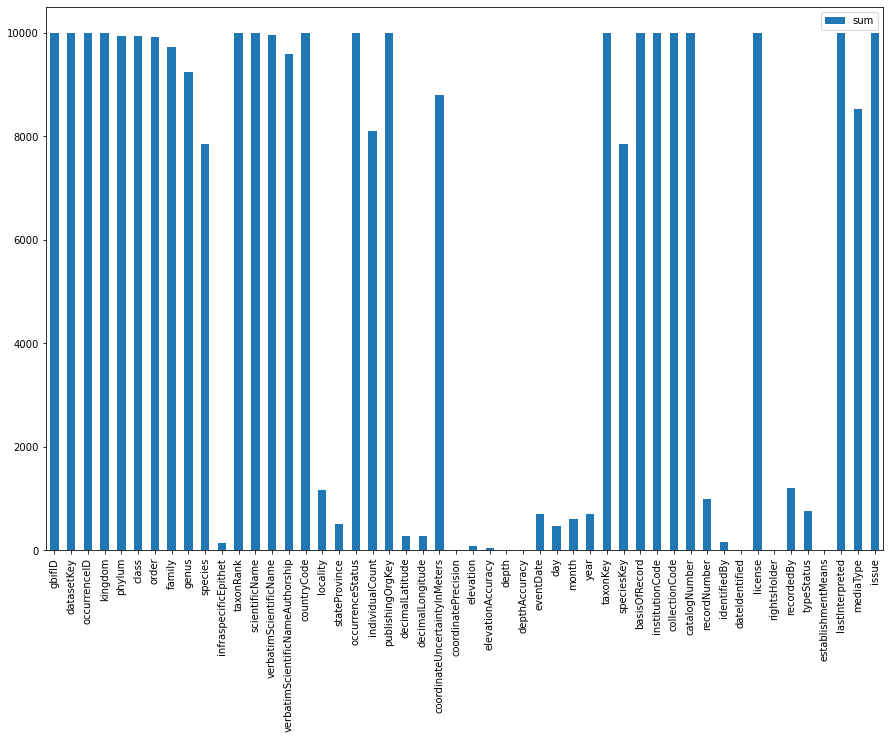

In [73]:
distribution_sum.T.plot.bar(figsize=(15,10))

                                      sum
gbifID                            1152468
datasetKey                        1152468
occurrenceID                      1058205
kingdom                           1152468
phylum                            1152468
class                             1152468
order                             1152468
family                            1152468
genus                             1141795
species                           1058416
infraspecificEpithet                53602
taxonRank                         1152468
scientificName                    1152468
verbatimScientificName            1147281
verbatimScientificNameAuthorship   832227
countryCode                       1084110
locality                           895032
stateProvince                      821935
occurrenceStatus                  1152468
individualCount                    217179
publishingOrgKey                  1152468
decimalLatitude                    568164
decimalLongitude                  

<AxesSubplot:>

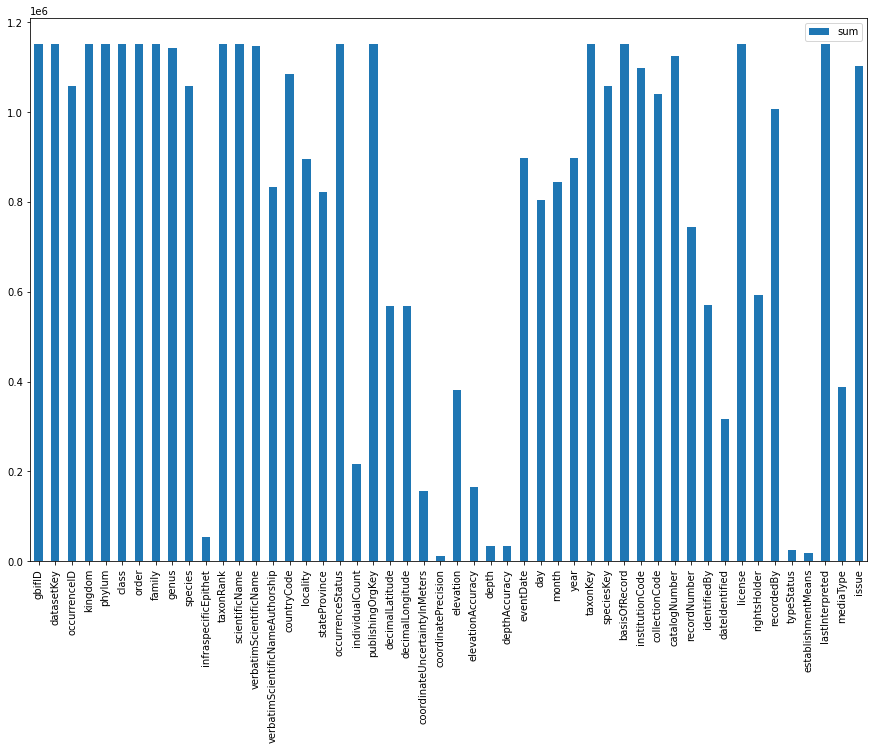

In [78]:
file = '~/Downloads/0229981-230224095556074.csv'  ## file location, gbif Solanacea
gbif_sample = pd.read_csv(file,chunksize=20000,encoding='utf-8',sep='\\t',on_bad_lines='skip',engine='python')
gbif_sample = pd.concat(gbif_sample)
distribution, distribution_sum = get_gbif_distribution(gbif_sample)
print(distribution_sum.T)
distribution_sum.T.plot.bar(figsize=(15,10))

                                      sum
gbifID                            1152468
occurrenceStatus                  1152468
datasetKey                        1152468
taxonKey                          1152468
basisOfRecord                     1152468
scientificName                    1152468
taxonRank                         1152468
license                           1152468
family                            1152468
order                             1152468
class                             1152468
phylum                            1152468
kingdom                           1152468
lastInterpreted                   1152468
publishingOrgKey                  1152468
verbatimScientificName            1147281
genus                             1141795
catalogNumber                     1124921
issue                             1101947
institutionCode                   1098504
countryCode                       1084110
species                           1058416
speciesKey                        

<AxesSubplot:>

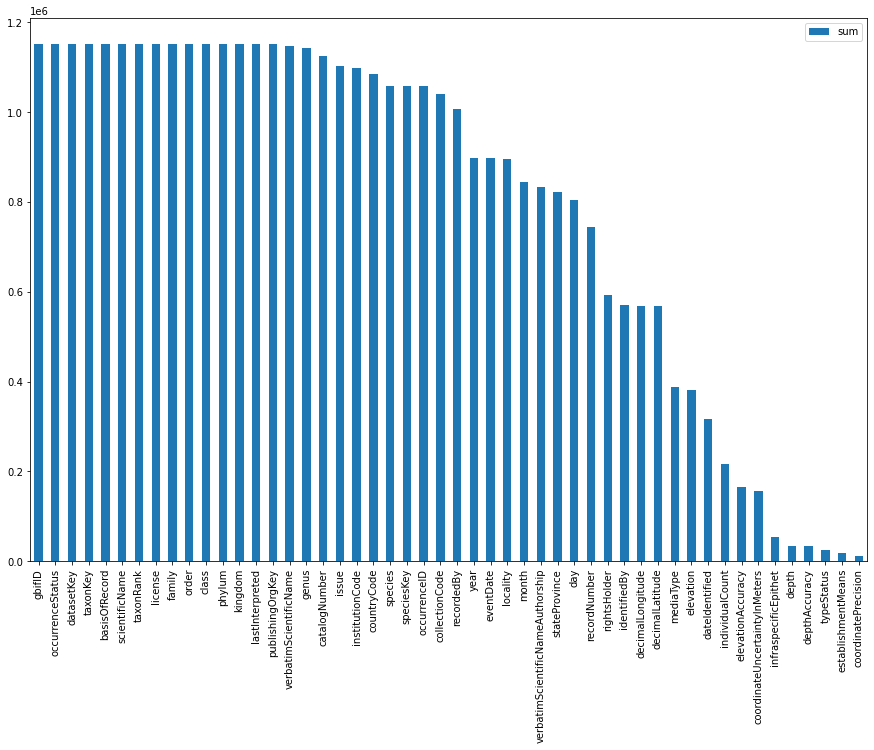

In [86]:
temp = distribution_sum.T.sort_values(by=['sum'], ascending=False)
print(temp)
temp.plot.bar(figsize=(15,10))

In [95]:
temp = gbif_sample['establishmentMeans'].value_counts()
print(temp)
## temp.T.plot.bar(figsize=(15,10))
'''
coordinateUncertaintyInMeters, coordinatePrecision, elevation, elevationAccuracy, depth, depthAccuracy, establishmentMeans, typeStatus
'''

Native                            15814
Introduced                         1080
Uncertain                           860
IntroducedAssistedColonisation        1
Name: establishmentMeans, dtype: int64


'\ncoordinateUncertaintyInMeters, coordinatePrecision, elevation, elevationAccuracy, depth, depthAccuracy, establishmentMeans, typeStatus\n'

In [34]:
a = distribution['month']
## a.T.plot.bar(figsize=(15,10))
for i in gbif_sample['recordedBy']:
    print(i)

2023-04-18T13:20:09.129Z
HOLOTYPE
Tessier-Yandell,
Gamble,
Gamble,
None
None
None
2023-04-18T13:20:09.192Z
None
None
None
None
None
None
CC_BY_4_0
None
None
None
van
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
StillImage
None
Ghose,
2023-04-18T13:20:09.262Z
None
M.
None
None
StillImage
None
None
2023-04-18T13:20:09.285Z
Griffith
T.C.
None
None
2023-04-18T13:20:09.300Z
None
StillImage
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
None
None
None
A.F.G.
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
2023-04-18T13:20:09.322Z
None
StillImage
None
StillImage
Siddick,
None
None
None
None
StillImage
Soibeh,
StillImage
CC_BY_4_0
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
A.D.E.
Sulit,
None
2023-04-18T13:20:09.413Z
StillImage
A.D.E.
StillIm

None
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
2023-04-18T13:20:20.091Z
CC_BY_4_0
J.A.
None
2023-04-18T13:20:20.112Z
Sanchez,
CC_BY_4_0
G.S.
StillImage
2023-04-18T13:20:20.136Z
StillImage
None
Madison,
B.
None
None
StillImage
None
StillImage
2023-04-18T13:20:20.217Z
None
Heringer
None
CC_BY_4_0
None
None
None
None
None
None
None
None
None
CC_BY_4_0
None
None
None
CC_BY_4_0
None
None
StillImage
Ferreira,
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
Ratter,
None
None
None
2023-04-18T13:20:20.380Z
StillImage
StillImage
Prance,
W.A.
CC_BY_4_0
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
B.A.
B.A.
B.A.
Jr.
[Spruce]
StillImage
None
None
None
Irwin,
CC_BY_4_0
None
None
None
None
None
None
2023-04-18T13:20:20.656Z
Monteiro,
2023-04-18T13:20:20.659Z
None
None
None
C.C.
None
Stil

None
2023-04-18T13:20:31.132Z
T.R.
2023-04-18T13:20:31.133Z
None
None
Saunders,
None
StillImage
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
None
None
B.A.
Forero,
StillImage
StillImage
None
None
None
None
Anderson,
Berg,
None
None
None
M.M.
None
2023-04-18T13:20:31.331Z
None
None
None
None
2023-04-18T13:20:31.389Z
Pickersgill,
None
None
StillImage
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
None
B.M.
None
None
2023-04-18T13:20:31.467Z
2023-04-18T13:20:31.469Z
StillImage
None
None
None
None
None
None
None
None
None
None
None
2023-04-18T13:20:31.827Z
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
None
None
Ule,
None
None
G.T.
2023-04-18T13:20:31.832Z
2023-04-18T13:20:31.833Z
2023-04-18T13:20:31.833Z
None
A.
None
None
None
Harley,
None
None
Berg,
None
None
None

None
StillImage
None
None
None
None
None
None
None
None
None
None
None
None
P.
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
None
None
None
None
J.H.
2023-04-18T13:11:50.231Z
StillImage
None
None
None
2023-04-18T13:11:50.299Z
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
2023-04-18T13:11:50.359Z
None
None
None
None
None
None
None
Taylor,
None
None
B.
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Watson,
StillImage
None
TAXON_MATCH_HIGHERRANK;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
None
E.
None
None
None
None
None
None
N.Y.
None
None
None
None
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
2023-04-18T13:11:51.099Z
None
None
None
None
None
None
H.
CONTINENT_DERIVED_FROM_COUNTRY;TAXON_MATCH_FUZZY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
None
None
None
None
None
StillImage
CONTINE

None
None
None
CC_BY_4_0
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
None
None
None
None
CC_BY_4_0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Ash,
None
None
None
None
None
None
None
None
None
Segerbaek,
None
None
None
2023-04-18T13:12:06.876Z
None
None
None
None
None
None
None
2023-04-18T13:12:06.928Z
None
Mrs
None
None
None
None
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
None
None
None
None
None
None
None
None
None
None
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
R.M.
None
None
Ash,
J.J.
None
None
None
None
None
None
None
2023-04-18T13:12:07.380Z
None
None
None
None
None
None
None
None
None
None
None
None
StillImage
None
None
None
None
J.R.I.
None
None
A.A.
None
J.J.
None
None
None
None
None
2023-04-18T13:12:07.775Z

StillImage
StillImage
None
None
None
None
None
M.
None
None
None
None
None
None
W.J.
None
None
None
StillImage
None
None
2023-04-18T13:12:26.996Z
None
None
None
StillImage
None
None
None
None
StillImage
Puradyatmika,
2023-04-18T13:12:27.359Z
J.;
None
None
None
2023-04-18T13:12:27.477Z
CC_BY_4_0
2023-04-18T13:12:27.478Z
R.J.
CC_BY_4_0
R.J.
None
Pennington,
None
None
None
None
None
None
None
None
None
None
R.J.
None
StillImage
None
Paulo,
None
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
None
None
None
None
None
None
None
None
None
None
None
2023-04-18T13:12:28.102Z
None
None
None
Prof.
None
None
None
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
CONTINENT_DERIVED_FROM_COUNTRY;INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_NONE
None
None
None
None
None
None
None
None
None
StillImage
2023-04-18T13:12:28.438Z
None
2023-04-18T13:12:28.539Z
None
None
None
None
StillImage
None
None
None
None
None
None
None
None
Ritchie,
S

In [221]:
with open('out.txt', 'w') as f:
    for columnName in gbif_columns:
        print(distribution[columnName], file=f)

In [197]:
## save the distribution to csv
## df = pd.DataFrame.from_dict(distribution, orient="index")
## df.to_csv('gbif_sample_distribution.csv', index=False)

In [ ]:
## df = pd.read_csv('gbif_sample_distribution.csv', index_col=0)
## d = df.to_dict("split")
## d = dict(zip(d["index"], d["data"]))

In [148]:
from functools import reduce

## Define MapReduce chunk-based functions for processing 
## For each chunk you load, you map or apply a processing function.
## Then, as you accumulate results, you “reduce” them by combining partial results into the final result.
def get_counts(chunk):
    current_count = chunk["country"]  ## same as value_counts(), not necessary
    return current_count.value_counts()

def add(previous_result, new_result):
    return previous_result.add(new_result, fill_value=0)

# MapReduce structure:
file = '~/nhm_coding/indian_collection_kg_single.csv'
chunks = pd.read_csv(file, chunksize=10000)
processed_chunks = map(get_counts, chunks)
result = reduce(add, processed_chunks)

result.sort_values(ascending=False, inplace=True)
print(result)

India                             41447.0
Nepal                             25043.0
Sri Lanka                         10444.0
Bhutan                             3608.0
Pakistan                           3319.0
Seychelles                         2025.0
Bangladesh                          718.0
Maldives                            168.0
British Indian Ocean Territory        7.0
nepal                                 3.0
Name: country, dtype: float64


In [3]:
file = '~/nhm_coding/indian_collection_kg_single.csv'  ##file location

data = pd.read_csv(file, encoding='utf-8',sep=None,on_bad_lines='skip',engine='python')
columns = data.columns.tolist()   ## load content into list
data.head()

,_id,catalogNumber,class,coordinateUncertaintyInMeters,country,day,decimalLatitude,decimalLongitude,family,fieldNumber,...,recordNumber,recordedBy,samplingProtocol,scientificName,scientificNameAuthorship,specificEpithet,stateProvince,typeStatus,waterBody,year
0,4836343,BM000718825,NaN,NaN,India,23,22.55909,88.29109,NaN,s.n.,...,s.n.,K Biswas,NaN,Caloglossa beccarii (Zanardini) De Toni,(Zanardini) De Toni,beccarii,West Bengal,NaN,NaN,1936
1,4812584,BM000718398,NaN,144.781478,Sri Lanka,NaN,NaN,NaN,NaN,s.n.,...,s.n.,A A. Kassem,NaN,Alsidium corallinum Agardh,Agardh,corallinum,NaN,NaN,NaN,1962
2,4813312,BM000717789,NaN,144.781478,Sri Lanka,NaN,NaN,NaN,NaN,s.n.,...,s.n.,Herdman,NaN,Gastroclonium,NaN,NaN,NaN,NaN,NaN,NaN
3,4824339,BM000717389,NaN,144.781478,Sri Lanka,NaN,NaN,NaN,NaN,s.n.,...,s.n.,Herdman,NaN,Codium tenue (Kütz.) Kütz.,(Kütz.) Kütz.,tenue,NaN,NaN,NaN,NaN
4,4824341,BM000717390,NaN,144.781478,Sri Lanka,NaN,NaN,NaN,NaN,s.n.,...,s.n.,Herdman,NaN,Codium ovale Zanardini,Zanardini,ovale,NaN,NaN,NaN,NaN


In [4]:
def get_distribution(data):
    sum_count = 0
    data_distribution = {} ## a dictionary to store the distribution of individual entity
    data_distribution_sum = pd.DataFrame(columns = columns, index=['sum'])
    for (columnName, columnData) in data.iteritems():
        temp = data[columnName].value_counts()
        data_distribution_sum.at['sum', columnName]=sum(temp)
    return data_distribution_sum

In [18]:
matches = set(columns).intersection(set(dwc_terms_columns))
print(matches)
print(len(matches))

{'island', 'modified', 'maximumDepthInMeters', 'decimalLongitude', 'higherGeography', 'minimumElevationInMeters', 'year', 'geodeticDatum', 'locality', 'fieldNumber', 'georeferenceProtocol', 'catalogNumber', 'samplingProtocol', 'recordedBy', 'stateProvince', 'scientificName', 'decimalLatitude', 'maximumElevationInMeters', 'class', 'genus', 'country', 'islandGroup', 'family', 'coordinateUncertaintyInMeters', 'day', 'occurrenceStatus', 'typeStatus', 'habitat', 'phylum', 'order', 'otherCatalogNumbers', 'scientificNameAuthorship', 'infraspecificEpithet', 'occurrenceID', 'member', 'identifiedBy', 'month', 'recordNumber', 'specificEpithet', 'higherClassification', 'minimumDepthInMeters', 'waterBody'}
42


                                 sum
_id                            86782
otherCatalogNumbers            86782
occurrenceID                   86782
higherGeography                86782
occurrenceStatus               86782
modified                       86782
country                        86782
catalogNumber                  86780
scientificName                 86635
genus                          84934
recordNumber                   84374
fieldNumber                    84374
recordedBy                     84223
higherClassification           83051
family                         82461
scientificNameAuthorship       77678
specificEpithet                73800
coordinateUncertaintyInMeters  65504
year                           51035
order                          50291
month                          45498
day                            40900
decimalLatitude                38318
decimalLongitude               38318
phylum                         29093
identifiedBy                   19207
g

<AxesSubplot:>

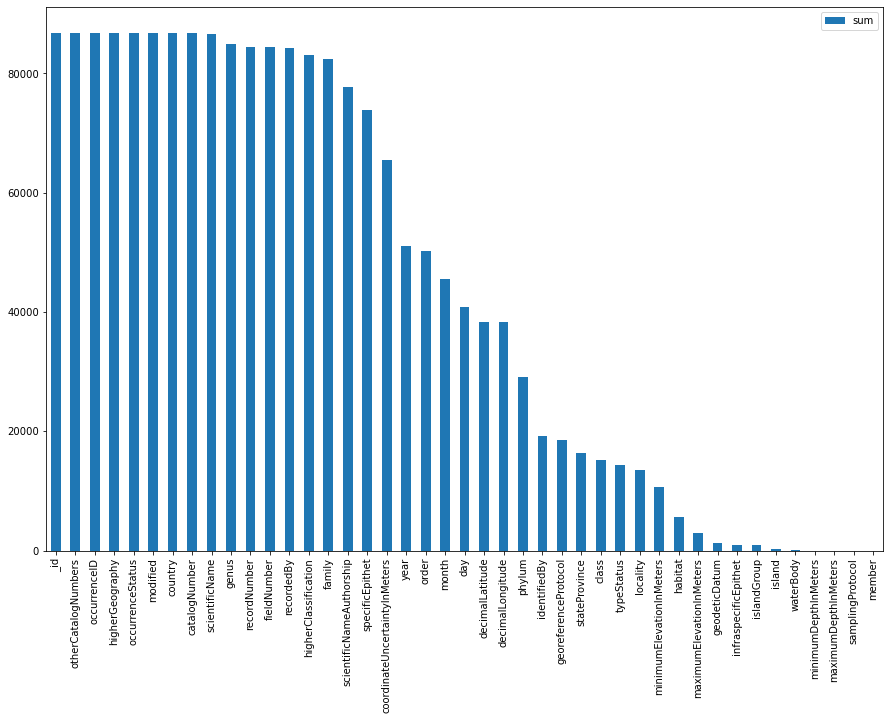

In [6]:
distribution = get_distribution(data)
temp = distribution.T.sort_values(by=['sum'], ascending=False)
print(temp)
temp.plot.bar(figsize=(15,10))

In [13]:
a = distribution/86782
b = a > 0.15
c = []
for colname in columns:
    if b.at['sum',colname]==True:
        c.append(colname)
print(c)
print(len(c))
print(columns)

['_id', 'catalogNumber', 'class', 'coordinateUncertaintyInMeters', 'country', 'day', 'decimalLatitude', 'decimalLongitude', 'family', 'fieldNumber', 'genus', 'georeferenceProtocol', 'higherClassification', 'higherGeography', 'identifiedBy', 'locality', 'modified', 'month', 'occurrenceID', 'occurrenceStatus', 'order', 'otherCatalogNumbers', 'phylum', 'recordNumber', 'recordedBy', 'scientificName', 'scientificNameAuthorship', 'specificEpithet', 'stateProvince', 'typeStatus', 'year']
31
['_id', 'catalogNumber', 'class', 'coordinateUncertaintyInMeters', 'country', 'day', 'decimalLatitude', 'decimalLongitude', 'family', 'fieldNumber', 'genus', 'geodeticDatum', 'georeferenceProtocol', 'habitat', 'higherClassification', 'higherGeography', 'identifiedBy', 'infraspecificEpithet', 'island', 'islandGroup', 'locality', 'maximumDepthInMeters', 'maximumElevationInMeters', 'member', 'minimumDepthInMeters', 'minimumElevationInMeters', 'modified', 'month', 'occurrenceID', 'occurrenceStatus', 'order', '

In [15]:
colnames = ['gbifID','occurrenceID','scientificName','scientificNameAuthorship','locality',
            'occurrenceStatus','decimalLatitude','decimalLongitude','day','month','year','basisOfRecord',
            'collectionCode','catalogNumber','recordNumber','dateIdentified','recordedBy','identifiedBy',
            'typeStatus','lastInterpreted','issue','stateProvince','taxonKey','institutionCode','countryCode']

a = set(columns).intersection(set(colnames))
b = set(c).intersection(set(colnames))
print(sorted(a))
print(sorted(b))

['catalogNumber', 'day', 'decimalLatitude', 'decimalLongitude', 'identifiedBy', 'locality', 'month', 'occurrenceID', 'occurrenceStatus', 'recordNumber', 'recordedBy', 'scientificName', 'scientificNameAuthorship', 'stateProvince', 'typeStatus', 'year']
['catalogNumber', 'day', 'decimalLatitude', 'decimalLongitude', 'identifiedBy', 'locality', 'month', 'occurrenceID', 'occurrenceStatus', 'recordNumber', 'recordedBy', 'scientificName', 'scientificNameAuthorship', 'stateProvince', 'typeStatus', 'year']


In [59]:
max_row = len(data)
print(max_row)

86782


In [7]:
sum_count = 0
for (columnName, columnData) in data.iteritems():
    # print(data[columnName].nunique())
    sum_count = sum_count + data[columnName].nunique()

print(sum_count)

286247


In [18]:
sum_count = 0
for (columnName, columnData) in data.iteritems():
    # print(data[columnName].nunique())
    if columnName != '_id':
        sum_count = sum_count + len(data.groupby(['_id', columnName]).size())

print(sum_count)

1111340


In [6]:
#file_link = '~/Downloads/relation.csv'  ##file location

df = pd.read_csv(file_link,encoding='utf-8',sep=None,on_bad_lines='skip',engine='python')
cols = data.columns.tolist()   ## load content into list
#print(columns)
#data.head()
max_row = len(df)
print(max_row)

353652


In [8]:
# Using DataFrame.copy() create new DaraFrame.
test_graph = data[['catalogNumber','country','recordedBy']].copy()
print(test_graph)

      catalogNumber    country            recordedBy
0       BM000718825      India              K Biswas
1       BM000718398  Sri Lanka           A A. Kassem
2       BM000717789  Sri Lanka               Herdman
3       BM000717389  Sri Lanka               Herdman
4       BM000717390  Sri Lanka               Herdman
...             ...        ...                   ...
86777   BM000749329      Nepal     Nathaniel Wallich
86778   BM000749327      Nepal                Taylor
86779   BM000746490      India                Hansen
86780   BM000749318      India   Dr King's Collector
86781   BM000748788      Nepal  Joseph Dalton Hooker

[86782 rows x 3 columns]


In [9]:
test_graph.to_csv('source_data_test.csv',index=False)

In [19]:
onehot_catalogNumber = pd.get_dummies(data.catalogNumber, prefix='catalogNumber', dummy_na=True)
onehot_catalogNumber

,catalogNumber_BM000000501,catalogNumber_BM000000507,catalogNumber_BM000000510,catalogNumber_BM000000518,catalogNumber_BM000000519,catalogNumber_BM000000520,catalogNumber_BM000000521,catalogNumber_BM000000525,catalogNumber_BM000000528,catalogNumber_BM000000529,...,catalogNumber_bm000629843,catalogNumber_bm000629844,catalogNumber_bm000629845,catalogNumber_bm000629846,catalogNumber_bm000629847,catalogNumber_bm000629848,catalogNumber_bm000645352,catalogNumber_bm000648003,catalogNumber_bm000648004,catalogNumber_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
nodes_file_link = '~/nhm_coding/GBIF_node_edge/Nodes_Table.csv'  ##file location
edges_file_link = '~/nhm_coding/GBIF_node_edge/Relations_Table.csv'  ##file location

entity_name_list = pd.read_csv(nodes_file_link,encoding='utf-8',on_bad_lines='skip',engine='python') ## sep=None
## entity_name_list.drop(entity_name_list.iloc[:, 1:3], inplace=True, axis=1) ## remove extra empty columns
## entity_name_list.to_csv('~/nhm_coding/GBIF_node_edge/Nodes_Table.csv',index=False)
entity_name_list = entity_name_list.transpose()
entity_name_list.columns = entity_name_list.iloc[0]
entity_name_list.head()

Nodes,Data ID,Basis of record,Collection code,Institution code,Catalogue number,Occurrence ID,Occurrence status,Recorded by,Day,Month,...,Geodetic datum,State province,Verbatim locality,Identifier,Record licence,Modified,References,Rights holder,MULTIMEDIA,CITATION
Nodes,Data ID,Basis of record,Collection code,Institution code,Catalogue number,Occurrence ID,Occurrence status,Recorded by,Day,Month,...,Geodetic datum,State province,Verbatim locality,Identifier,Record licence,Modified,References,Rights holder,MULTIMEDIA,CITATION


In [90]:
entity_name_list_columns = entity_name_list.columns.tolist()
print(entity_name_list_columns)

['Data ID', 'Basis of record', 'Collection code', 'Institution code', 'Catalogue number', 'Occurrence ID', 'Occurrence status', 'Recorded by', 'Day', 'Month', 'Year', 'Event date', 'Verbatim event date', 'Date identified', 'Identification ID', 'Identification remarks', 'Identified by', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Specific epithet', 'Generic name', 'Scientific name', 'Rank', 'Taxonomic status', 'Continent', 'Country or area', 'Country code', 'Decimal latitude', 'Decimal longitude', 'Geodetic datum', 'State province', 'Verbatim locality', 'Identifier', 'Record licence', 'Modified', 'References', 'Rights holder', 'MULTIMEDIA', 'CITATION']


In [11]:
relation_name_list = pd.read_csv(edges_file_link,encoding='utf-8', on_bad_lines='skip',engine='python')

In [12]:
relation_name_list.columns.tolist() ## load content into list

['Relations', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [20]:
# encoder to convert entity to numeric value
def encode_map(input_array):
    p_map={}
    length=len(input_array)
    for index, ele in zip(range(length),input_array):
        # print(ele,index)
        p_map[str(ele)] = index
    return p_map

# decoder to convert nodes back to entities
def decode_map(encode_map):
    de_map={}
    for k,v in encode_map.items():
        # index,ele 
        de_map[v]=k
    return de_map

In [9]:
# Function that return the encode mapping dictionary and decode mapping dictionary of a input csv
def node_mapping(input_df):
    encode_map_dictionary = {}
    decode_map_dictionary = {}
    map_count = {}
    for (columnName, columnData) in input_df.iteritems():
        # print('Column Name : ', columnName)
        # print('Column Contents : ', len(columnData.values))
        encode_map_dictionary[columnName] = encode_map(set(input_df[columnName].values))
        decode_map_dictionary[columnName] = decode_map(encode_map_dictionary[columnName])
        
    for (columnName, columnData) in input_df.iteritems():
        graph_features_pdf[columnName + '_id_encoded'] = graph_features_pdf[columnName].apply(lambda e: encode_map_dictionary[columnName].get(str(e),-1))
        
        map_count[columnName + '_id_encoded'] =len(set(graph_features_pdf[columnName + '_id_encoded'].values))
        
    return encode_map_dictionary, decode_map_dictionary

In [11]:
test_graph

,catalogNumber,country,recordedBy
0,BM000718825,India,K Biswas
1,BM000718398,Sri Lanka,A A. Kassem
2,BM000717789,Sri Lanka,Herdman
3,BM000717389,Sri Lanka,Herdman
4,BM000717390,Sri Lanka,Herdman
...,...,...,...
86777,BM000749329,Nepal,Nathaniel Wallich
86778,BM000749327,Nepal,Taylor
86779,BM000746490,India,Hansen
86780,BM000749318,India,Dr King's Collector


In [12]:
graph_features_pdf = test_graph
encode_dic, decode_dic = node_mapping(test_graph)
print(graph_features_pdf)

      catalogNumber    country            recordedBy  \
0       BM000718825      India              K Biswas   
1       BM000718398  Sri Lanka           A A. Kassem   
2       BM000717789  Sri Lanka               Herdman   
3       BM000717389  Sri Lanka               Herdman   
4       BM000717390  Sri Lanka               Herdman   
...             ...        ...                   ...   
86777   BM000749329      Nepal     Nathaniel Wallich   
86778   BM000749327      Nepal                Taylor   
86779   BM000746490      India                Hansen   
86780   BM000749318      India   Dr King's Collector   
86781   BM000748788      Nepal  Joseph Dalton Hooker   

       catalogNumber_id_encoded  country_id_encoded  recordedBy_id_encoded  
0                         12326                   0                    107  
1                         38763                   5                   1073  
2                         18209                   5                   1500  
3                  

In [29]:
print(graph_features_pdf.columns[3:len(graph_features_pdf.columns)])
index = int(len(graph_features_pdf.columns)/2)
graph_features_pdf[graph_features_pdf.columns[index:len(graph_features_pdf.columns)]].sort_values(by=graph_features_pdf.columns[index], ascending=True)

Index(['catalogNumber_id_encoded', 'country_id_encoded',
       'recordedBy_id_encoded'],
      dtype='object')


,catalogNumber_id_encoded,country_id_encoded,recordedBy_id_encoded
79211,0,0,154
79210,0,0,154
24113,1,2,978
24114,1,2,978
36728,2,0,88
...,...,...,...
81484,52087,7,1992
37786,52088,2,2556
13637,52089,5,0
13638,52089,5,0


In [10]:
graph_features_pdf = data
encode_dic, decode_dic = node_mapping(data)
print(graph_features_pdf)

           _id catalogNumber class  coordinateUncertaintyInMeters    country  \
0      4836343   BM000718825   NaN                            NaN      India   
1      4812584   BM000718398   NaN                     144.781478  Sri Lanka   
2      4813312   BM000717789   NaN                     144.781478  Sri Lanka   
3      4824339   BM000717389   NaN                     144.781478  Sri Lanka   
4      4824341   BM000717390   NaN                     144.781478  Sri Lanka   
...        ...           ...   ...                            ...        ...   
86777  1988983   BM000749329   NaN                            NaN      Nepal   
86778  1988981   BM000749327   NaN                            NaN      Nepal   
86779   632768   BM000746490   NaN                            NaN      India   
86780  1988887   BM000749318   NaN                            NaN      India   
86781  1209491   BM000748788   NaN                            NaN      Nepal   

       day  decimalLatitude  decimalLon

In [11]:
graph_features_pdf.to_csv('graph_features_pdf.csv',index=False)

In [38]:
map_dic = {}
map_dic['catalogNumber'] = encode_map(set(test_graph['catalogNumber'].values))
map_dic['country'] = encode_map(set(test_graph['country'].values))
# map_dic

In [19]:
for c in data.columns.tolist():
    print(c+'_id_map')

_id_id_map
catalogNumber_id_map
class_id_map
coordinateUncertaintyInMeters_id_map
country_id_map
day_id_map
decimalLatitude_id_map
decimalLongitude_id_map
family_id_map
fieldNumber_id_map
genus_id_map
geodeticDatum_id_map
georeferenceProtocol_id_map
habitat_id_map
higherClassification_id_map
higherGeography_id_map
identifiedBy_id_map
infraspecificEpithet_id_map
island_id_map
islandGroup_id_map
locality_id_map
maximumDepthInMeters_id_map
maximumElevationInMeters_id_map
member_id_map
minimumDepthInMeters_id_map
minimumElevationInMeters_id_map
modified_id_map
month_id_map
occurrenceID_id_map
occurrenceStatus_id_map
order_id_map
otherCatalogNumbers_id_map
phylum_id_map
recordNumber_id_map
recordedBy_id_map
samplingProtocol_id_map
scientificName_id_map
scientificNameAuthorship_id_map
specificEpithet_id_map
stateProvince_id_map
typeStatus_id_map
waterBody_id_map
year_id_map


In [63]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 2: Load CSV Data
data = pd.read_csv('file.csv')

# Step 3: Create Nodes
entities = list(set(data[['entity1', 'entity2']].values.flatten()))
G = nx.DiGraph()
G.add_nodes_from(entities)

# Step 4: Create Edges
edges = data[['entity1', 'entity2', 'relationship']].values.tolist()
G.add_weighted_edges_from(edges)

# Step 5: Add Attributes to Nodes and Edges
# You can add attributes to nodes and edges using set_node_attributes() and set_edge_attributes() functions

# Step 6: Visualize the Knowledge Graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'file.csv'

In [ ]:
import numpy as np
import torch
import dgl
import dgl.function as fn
from dgl import DGLGraph
from dgl.data import citation_graph as citegrh
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

# Step 2: Prepare Data
g = citegrh.load_cora()
features = torch.FloatTensor(g.ndata['feat'])
labels = torch.LongTensor(g.ndata['label'])
train_mask = torch.BoolTensor(g.ndata['train_mask'])
val_mask = torch.BoolTensor(g.ndata['val_mask'])
test_mask = torch.BoolTensor(g.ndata['test_mask'])

# Step 3: Define the Model
class RGCN(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats, rel_names):
        super(RGCN, self).__init__()
        self.conv1 = dgl.nn.RelGraphConv(
            in_feats, hid_feats, len(rel_names), activation=F.relu)
        self.conv2 = dgl.nn.RelGraphConv(
            hid_feats, out_feats, len(rel_names))
    
    def forward(self, g, x, rel):
        h = self.conv1(g, x, rel)
        h = self.conv2(g, h, rel)
        return h

# Step 4: Train the Model
model = RGCN(features.shape[1], 16, len(g.classes), g.etypes)
opt = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
for epoch in range(100):
    model.train()
    logits = model(g, features, g.etypes)
    loss = criterion(logits[train_mask], labels[train_mask])
    opt.zero_grad()
    loss.backward()
    opt.step()

# Step 5: Evaluate the Model
model.eval()
with torch.no_grad():
    logits = model(g, features, g.etypes)
    pred = logits.argmax(1)
    acc = (pred == labels).float().mean()
    print(f'Accuracy: {acc.item()}')


In [27]:
data_dict = {
    ('user', 'watches', 'movie'): (torch.tensor([0, 0, 1, 2]),
                                   torch.tensor([0, 1, 0, 1])),
    ('director', 'directs', 'movie'): (torch.tensor([0, 1]),
                                       torch.tensor([1, 0]))
}
hetero_graph = dgl.heterograph(data_dict)
hetero_graph

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

In [30]:
hetero_graph.ntypes

['director', 'movie', 'user']

In [31]:
hetero_graph.etypes

['directs', 'watches']

In [5]:
# 边 0->1, 0->2, 0->3, 1->3
u, v = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
g = dgl.graph((u, v))
print(g) # 图中节点的数量是DGL通过给定的图的边列表中最大的点ID推断所得出的
# 获取节点的ID
print(g.nodes())
# 获取边的对应端点
print(g.edges())
# 获取边的对应端点和边ID
print(g.edges(form='all'))
# 如果具有最大ID的节点没有边，在创建图的时候，用户需要明确地指明节点的数量。
g = dgl.graph((u, v), num_nodes=8)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})
tensor([0, 1, 2, 3])
(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))
(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


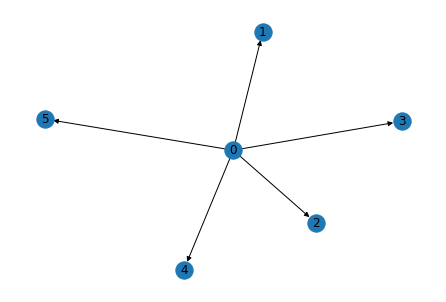

In [6]:
#构建图，添加节点和边
import networkx as nx
import matplotlib.pyplot as plt
#构建星型图
u=[0,0,0,0,0]
v=[1,2,3,4,5]
#第一种方式,u和v的数组,他们是相同的长度
star1 = dgl.graph((u,v))
nx.draw(star1.to_networkx(),with_labels=True)#可视化图
plt.show()


In [8]:
star2 = dgl.graph((0,v))
#对于星型,是可以广播的 （根本不行！！！）
nx.draw(star2.to_networkx(),with_labels=True)
plt.show()

TypeError: object of type 'int' has no len()

/Users/mbax9qg2/anaconda3/envs/dgl/lib/python3.9/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


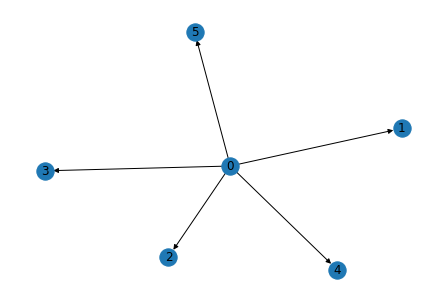

In [9]:
star3= dgl.DGLGraph([(0,1),(0,2),(0,3),(0,4),(0,5)])
#直接枚举
nx.draw(star3.to_networkx(),with_labels=True)
plt.show()

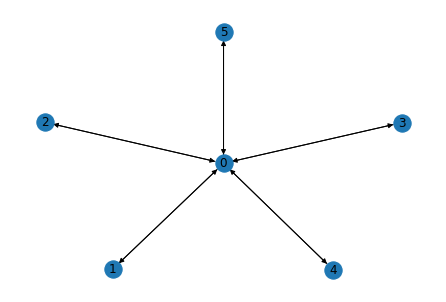

In [10]:
star4 = dgl.DGLGraph((u+v,v+u))#雙向圖的偷懶方法
nx.draw(star4.to_networkx(),with_labels=True)#可视化图
plt.show()

In [11]:
# https://docs.dgl.ai/en/0.8.x/generated/dgl.save_graphs.html

nodes_data = pd.read_csv('data/nodes.csv')
print(nodes_data)

edges_data = pd.read_csv('data/edges.csv')
print(edges_data)

src = edges_data['Src'].to_numpy()
dst = edges_data['Dst'].to_numpy()

# Create a DGL graph from a pair of numpy arrays
g = dgl.graph((src, dst))

# Print a graph gives some meta information such as number of nodes and edges.
print(g)

g1 = dgl.graph(([0, 1, 2], [1, 2, 3]))
g2 = dgl.graph(([0, 2], [2, 3]))
g2.edata["e"] = th.ones(2, 4)

graph_labels = {"glabel": th.tensor([0, 1])}
save_graphs("./data.bin", [g1, g2], graph_labels)

NameError: name 'save_graphs' is not defined

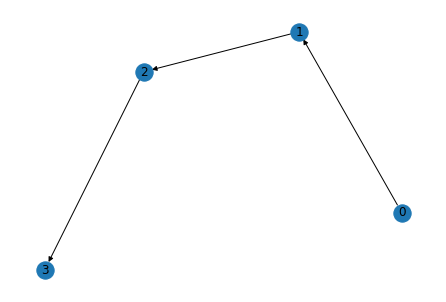

In [12]:
nx.draw(g1.to_networkx(),with_labels=True)#可视化图
plt.show()

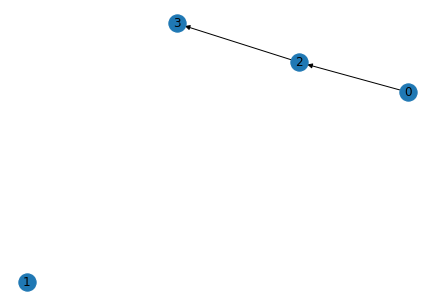

In [13]:
nx.draw(g2.to_networkx(),with_labels=True)#可视化图
plt.show()

In [16]:
# load processed data from directory `self.save_path`

from dgl.data.utils import load_graphs
glist, label_dict = load_graphs("./data.bin") # glist will be [g1, g2]
# glist, label_dict = load_graphs("./data.bin", [0]) # glist will be [g1]


In [17]:
glist

[Graph(num_nodes=4, num_edges=3,
       ndata_schemes={}
       edata_schemes={}),
 Graph(num_nodes=4, num_edges=2,
       ndata_schemes={}
       edata_schemes={'e': Scheme(shape=(4,), dtype=torch.float32)})]

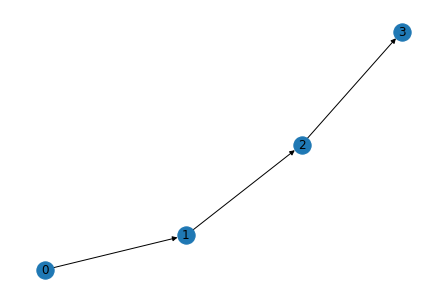

In [18]:
nx.draw(glist[0].to_networkx(),with_labels=True)#可视化图
plt.show()

In [ ]:
def has_cache(self):
    # check whether there are processed data in `self.save_path`
    graph_path = os.path.join(self.save_path, self.mode + '_dgl_graph.bin')
    info_path = os.path.join(self.save_path, self.mode + '_info.pkl')
    return os.path.exists(graph_path) and os.path.exists(info_path)

In [12]:
import urllib.request
from dgl.data import DGLDataset

In [13]:
import urllib.request
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/members.csv', './members.csv')
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/interactions.csv', './interactions.csv')

members = pd.read_csv('./members.csv')
members.head()

interactions = pd.read_csv('./interactions.csv')
interactions.head()

,Src,Dst,Weight
0,0,1,0.043591
1,0,2,0.282119
2,0,3,0.370293
3,0,4,0.730570
4,0,5,0.821187


In [14]:
class KarateClubDataset(DGLDataset):
    def __init__(self):
        super().__init__(name='karate_club')

    def process(self):
        nodes_data = members
        edges_data = interactions
        node_features = torch.from_numpy(nodes_data['Age'].to_numpy())
        node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())  # 将Club属性变为category类型，往往作为label 并且转为0,1
        edge_features = torch.from_numpy(edges_data['Weight'].to_numpy())
        edges_src = torch.from_numpy(edges_data['Src'].to_numpy())
        edges_dst = torch.from_numpy(edges_data['Dst'].to_numpy())

        self.graph = dgl.graph((edges_src, edges_dst), num_nodes=nodes_data.shape[0])
        self.graph.ndata['feat'] = node_features
        self.graph.ndata['label'] = node_labels
        self.graph.edata['weight'] = edge_features

        # If your dataset is a node classification dataset, you will need to assign
        # masks indicating whether a node belongs to training, validation, and test set.
        n_nodes = nodes_data.shape[0]
        n_train = int(n_nodes * 0.6)
        n_val = int(n_nodes * 0.2)
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        val_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[:n_train] = True
        val_mask[n_train:n_train + n_val] = True
        test_mask[n_train + n_val:] = True
        self.graph.ndata['train_mask'] = train_mask
        self.graph.ndata['val_mask'] = val_mask
        self.graph.ndata['test_mask'] = test_mask

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1

dataset = KarateClubDataset()
graph = dataset[0]

print(graph)


Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int8), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


/var/folders/gf/wqsz1zkd6x95xx3fgy6qr2780000gn/T/ipykernel_47716/3451395353.py:9: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1659484620427/work/torch/csrc/utils/tensor_numpy.cpp:178.)
  node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())  # 将Club属性变为category类型，往往作为label 并且转为0,1


In [15]:
nodes_data = members
node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())

In [16]:
node_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int8)

In [17]:
node_features = torch.from_numpy(nodes_data['Age'].to_numpy())
node_features

tensor([44, 37, 37, 40, 30, 32, 36, 47, 35, 37, 35, 46, 46, 48, 41, 49, 46, 38,
        44, 41, 48, 34, 43, 41, 40, 34, 38, 42, 42, 44, 48, 41, 35, 46])

In [9]:
cat_catalogNumber = torch.from_numpy(data.catalogNumber.astype('category').cat.codes.to_numpy())
print(cat_catalogNumber)
print(len(cat_catalogNumber))
print(len(set(cat_catalogNumber)))

tensor([14617, 14599, 14595,  ..., 15258, 15342, 15318], dtype=torch.int32)
86782
86782


In [35]:
data.catalogNumber

0        BM000718825
1        BM000718398
2        BM000717789
3        BM000717389
4        BM000717390
            ...     
86777    BM000749329
86778    BM000749327
86779    BM000746490
86780    BM000749318
86781    BM000748788
Name: catalogNumber, Length: 86782, dtype: object

In [20]:
mylist = cat_catalogNumber
myset = set(mylist)
if len(mylist) != len(myset):
    print("duplicates found in the list")
else:
    print("No duplicates found in the list")

No duplicates found in the list


In [21]:
# https://selflearningsuccess.com/pythonstring/
# https://builtin.com/machine-learning/nlp-word2vec-python